In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import re
import string
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split


import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
display(df.head())
print(f'Text example : {df.iloc[0].review}')

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text example : One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is

In [3]:
def data_preprocessing(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text) # Remove HTML from text
    text = ''.join([c for c in text if c not in string.punctuation])# Remove punctuation
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

df['cleaned_reviews'] = df['review'].apply(data_preprocessing)
display(df.head())

,review,sentiment,cleaned_reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# Tokenizer

Tokenizing was done to change between a string input into an integer input, it changes all the 'review' into a list of integer based on the defined vocabulary/corpus.

In [4]:
# import torchtext
# from torchtext.data import get_tokenizer

corpus = [word for text in df['cleaned_reviews'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()

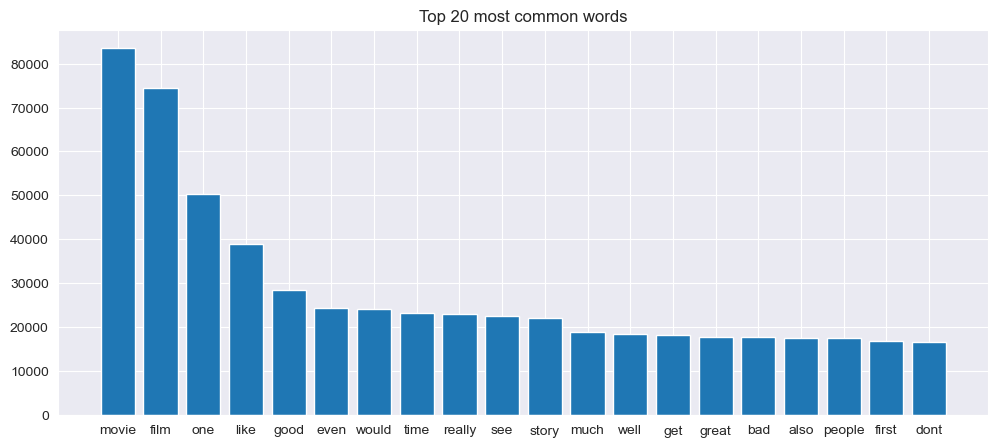

In [5]:
keys = []
values = []

for key, val in sorted_words[:20]:
    keys.append(key)
    values.append(val)

plt.figure(figsize=(12,5))
plt.bar(keys,values)
plt.title("Top 20 most common words")
plt.show()

In [6]:
stoi = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

reviews_stoi = []
for text in df['cleaned_reviews']:
    r = [stoi[word] for word in text.split()]
    reviews_stoi.append(r)

df['review_stoi'] = reviews_stoi
print(f'example : {df.iloc[0].review_stoi}')
display(df.head())

example : [3, 1809, 941, 56, 398, 3216, 286, 349, 3024, 107, 482, 471, 7412, 19, 57, 3097, 3216, 5384, 14831, 50, 473, 180, 107, 549, 52, 1605, 41, 8024, 5580, 11453, 41, 2358, 5834, 5492, 1339, 276, 473, 3259, 246, 233, 60896, 353, 3216, 11120, 240, 15438, 6674, 2418, 939, 60897, 2482, 1247, 24496, 422, 4557, 2375, 1080, 6877, 2828, 12558, 298, 60898, 16892, 213, 4901, 3569, 422, 236, 83230, 8153, 39824, 14832, 4989, 7605, 2318, 16893, 60899, 224, 8951, 7194, 12973, 8403, 33774, 34, 126, 21145, 7, 45, 166, 1173, 41, 551, 91, 159, 154, 436, 2842, 704, 84, 1144, 4165, 2352, 975, 704, 1282, 704, 83231, 58, 853, 87, 19, 286, 43, 103, 3097, 1451, 2067, 288, 45, 1422, 174, 1336, 1122, 3216, 88, 9930, 213, 1949, 1961, 473, 473, 7674, 6878, 4782, 13673, 2798, 31538, 6770, 13673, 380, 500, 14, 140, 13, 9589, 633, 694, 6770, 543, 1080, 19845, 551, 439, 809, 1860, 1080, 444, 56, 3216, 98, 302, 3602, 3115, 83232, 14, 1083, 3862, 392]


,review,sentiment,cleaned_reviews,review_stoi
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,"[3, 1809, 941, 56, 398, 3216, 286, 349, 3024, ..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,"[277, 37, 252, 1234, 2863, 17758, 83233, 1501,..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,"[96, 277, 26, 988, 8, 782, 1348, 2347, 1065, 8..."
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,"[572, 124, 136, 37, 327, 3493, 1071, 124, 908,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,"[83238, 33775, 35, 8, 187, 2020, 1251, 2, 29, ..."


In [7]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df.head() 

,review,sentiment,cleaned_reviews,review_stoi
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...,"[3, 1809, 941, 56, 398, 3216, 286, 349, 3024, ..."
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...,"[277, 37, 252, 1234, 2863, 17758, 83233, 1501,..."
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...,"[96, 277, 26, 988, 8, 782, 1348, 2347, 1065, 8..."
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...,"[572, 124, 136, 37, 327, 3493, 1071, 124, 908,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...,"[83238, 33775, 35, 8, 187, 2020, 1251, 2, 29, ..."


# Padding

Padding was done so that each 'review' when changed into an integer has the same dimension across all inputs. In this case we set '0' to be our padding, meaning that there is no text/words. Padding could be done before the text or after the text, but in this case I created the padding to be before the text, that's why there is a lot of 0 in most cases of the arrays.

In [8]:
s_length = 180
f = np.zeros((168, s_length ),dtype=int)
f[0] =  [0] * (s_length - len(df.iloc[0].review_stoi)) + df.iloc[0].review_stoi 
f

array([[   0,    0,    0, ..., 1083, 3862,  392],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [9]:
def padding(review_int, seq_length):
    features =  np.zeros((len(review_int), seq_length), dtype=int)
    for i, review in enumerate(review_int):
        if len(review) >= seq_length:
            features[i] = review[:seq_length]
        else:
            features[i] = [0] * (seq_length - len(review)) + review
    
    return features

In [10]:
# df['cleaned_reviews'].apply(lambda x: len(x)).mean()
SEQ_LENGTH = 200
features = padding(df.review_stoi, SEQ_LENGTH)
print(features[0, :])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     3  1809   941    56
   398  3216   286   349  3024   107   482   471  7412    19    57  3097
  3216  5384 14831    50   473   180   107   549    52  1605    41  8024
  5580 11453    41  2358  5834  5492  1339   276   473  3259   246   233
 60896   353  3216 11120   240 15438  6674  2418   939 60897  2482  1247
 24496   422  4557  2375  1080  6877  2828 12558   298 60898 16892   213
  4901  3569   422   236 83230  8153 39824 14832  4989  7605  2318 16893
 60899   224  8951  7194 12973  8403 33774    34   126 21145     7    45
   166  1173    41   551    91   159   154   436  2842   704    84  1144
  4165  2352   975   704  1282   704 83231    58   853    87    19   286
    43   103  3097  1451  2067   288    45  1422   174  1336  1122  3216
    88  9930   213  1949  1961   473   473  7674  6

# Train, Val, and Test Data 

Creating a TensorDataset so that it can be inputted into the model and also splitting the data into training, validation, and testing set. We also create a DataLoader so that we have data per batch sizes that is used to train the model.

In [11]:
X_train, X_remain, y_train, y_remain = train_test_split(features, df['sentiment'].to_numpy(), test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=1)


# Create a Tensor dataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
val_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

# DataLoaders to load the data into batches
BATCH_SIZE =  50
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_data, shuffle=True, batch_size=BATCH_SIZE)

In [12]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print(f'Sample input size: {sample_x.size()}') # BATCH_SIZE, SEQ_LENGTH
print(f'Sample input: {sample_x}')
print(f'Sample output: {sample_y}')

Sample input size: torch.Size([50, 200])
Sample input: tensor([[    0,     0,     0,  ...,    20,   264,   245],
        [    0,     0,     0,  ..., 65667,    39,  1557],
        [    0,     0,     0,  ...,   193,   600,  2382],
        ...,
        [    0,     0,     0,  ...,     7,   249,   146],
        [    0,     0,     0,  ...,    57,   595,   168],
        [    0,     0,     0,  ...,  5750,  5907,  5447]], dtype=torch.int32)
Sample output: tensor([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0])


# Creating the Model

In [60]:
class NN(nn.Module):
    
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout_prob=0.5):
        super(NN, self).__init__()
        
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.dropout_prob = dropout_prob
        self.hidden_dim = hidden_dim
        self.output_size = output_size
        self.n_layers = n_layers
        
        # Embedding and LSTM layer
        self.embed = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout_prob, batch_first=True)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.5)
        
        # Linear and Sigmoid
        self.linear = nn.Linear(hidden_dim, output_size)
        self.output = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        # embedding and lstm_out
        embeds = self.embed(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        
        # stacking the lstm outputs
#         lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        lstm_out = lstm_out.reshape(-1, self.hidden_dim)
        # Dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.linear(out)
        
        # output
        output = self.output(out)
        output = output.view(batch_size, -1)
        output = output[:, -1] # get last batch of labels
        
        return output, hidden
    
    def init_hidden(self, batch_size):
        
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.n_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [61]:
device = "cuda" if torch.cuda.is_available() else "cpu"


# model parameter
vocab_size = len(stoi) + 1
output_size = 1
embedding_dim = 64
hidden_dim = 256
n_layers = 2

model = NN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model = model.to(device)

print(model)

NN(
  (embed): Embedding(222610, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=256, out_features=1, bias=True)
  (output): Sigmoid()
)


In [62]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr)
loss_f = nn.BCELoss()

steps = len(train_loader)
clip = 5
num_epochs = 2

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

for epoch in range(num_epochs):
    train_loss = []
    train_acc = 0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(BATCH_SIZE)
    for i , (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        h = tuple([each.data for each in h])
        
        
        model.zero_grad()
        # Forward pass
        outputs, h = model(inputs, h)
        
        
        # Loss
        loss = loss_f(outputs.squeeze(), labels.float()) # train loss
        loss.backward()
        train_loss.append(loss.item())
        
        # calculating acc
        accuracy = acc(outputs,labels)
        train_acc += accuracy
        
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
    
    val_h = model.init_hidden(BATCH_SIZE)
    val_loss = []
    val_acc = 0
    model.eval()
    for i , (inputs, labels) in enumerate(val_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        val_h = tuple([each.data for each in val_h])
        
        output, val_h = model(inputs, val_h)
        v_loss = loss_f(output.squeeze(), labels.float())
        val_loss.append(v_loss.item())

        
        accuracy = acc(output, labels)
        val_acc += accuracy
      
    epoch_train_loss = np.mean(train_loss)
    epoch_val_loss = np.mean(val_loss)  
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(val_loader.dataset)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} | val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} | val_accuracy : {epoch_val_acc*100}')
        

Epoch 1
train_loss : 0.5739497682824731 | val_loss : 0.47954834312200545
train_accuracy : 69.6125 | val_accuracy : 77.98
Epoch 2
train_loss : 0.36843877701088784 | val_loss : 0.367910216152668
train_accuracy : 84.495 | val_accuracy : 84.61999999999999


In [66]:
# Testing
test_losses = [] # track loss
num_correct = 0

# init hidden state
test_h = model.init_hidden(BATCH_SIZE)

model.eval()
# iterate over test data
with torch.no_grad():
    for inputs, labels in test_loader:
        test_h = tuple([each.data for each in test_h])
        inputs, labels = inputs.to(device), labels.to(device)

        outputs, test_h = model(inputs, test_h)

        # calculate loss
        test_loss = loss_f(outputs.squeeze(), labels.float())
        test_losses.append(test_loss)

        # convert output probabilities
        pred = torch.round(outputs.squeeze())

        # compare prediction to actual
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy())
        num_correct += np.sum(correct)

    print("Test loss: {:.3f}".format(np.mean(test_losses)))

    test_acc = num_correct/len(test_loader.dataset)
    print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.341
Test accuracy: 0.857
